In [34]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import  matplotlib.pyplot as plt


In [53]:
df = pd.read_csv("./insurance.csv")
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
import warnings
warnings.filterwarnings("ignore")


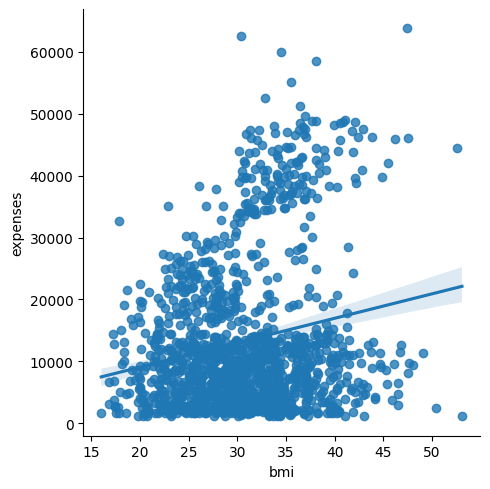

In [8]:
sns.lmplot(x="bmi",y="expenses",data = df)

In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


check for missing value

Text(0.5, 1.0, 'missing value in the dataset')

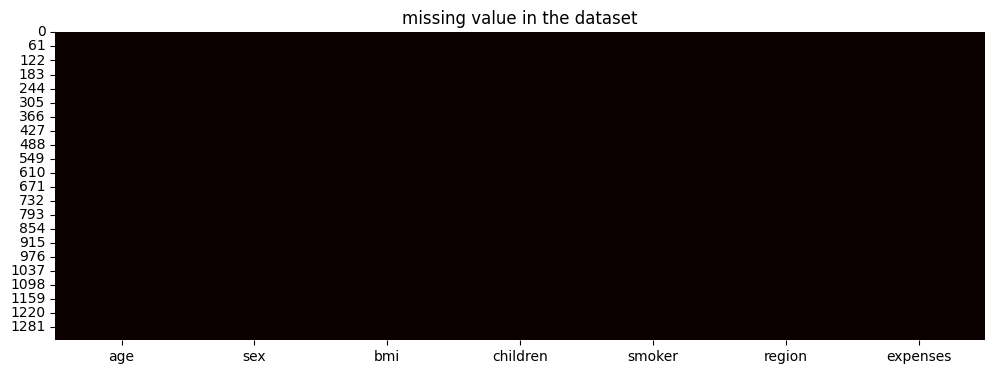

In [20]:
sns.heatmap(df.isnull(),cbar = False,cmap = "hot")
plt.title("missing value in the dataset")

<Axes: >

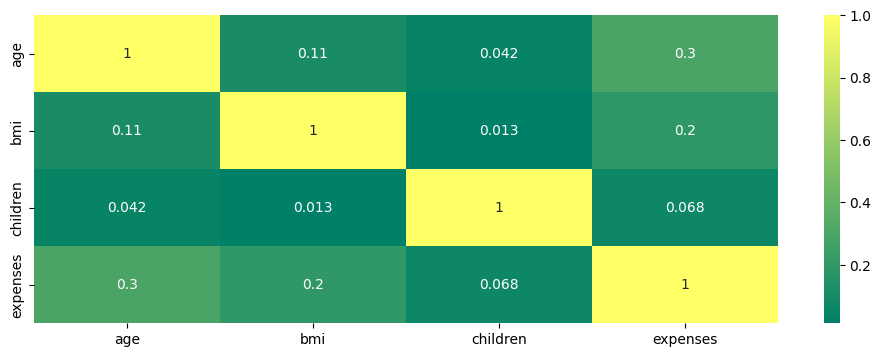

In [28]:
# Select columns with numerical values
numerical_columns = df.select_dtypes(include=['number'])
corr = numerical_columns.corr()
sns.heatmap(corr,cmap = "summer",annot = True)

Data Preprocessing
Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

Label Encoding
One hot encoding
Dummy variable trap

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.


In [74]:
#dummy variable
catagorical_columns = ["sex","children","smoker","region"]
df_encode = pd.get_dummies(data=df,columns = catagorical_columns,drop_first = True,dtype = 'int8')
df_encode

,age,bmi,expenses,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,16884.92,0,0,0,0,0,0,1,0,0,1
1,18,33.8,1725.55,1,1,0,0,0,0,0,0,1,0
2,28,33.0,4449.46,1,0,0,1,0,0,0,0,1,0
3,33,22.7,21984.47,1,0,0,0,0,0,0,1,0,0
4,32,28.9,3866.86,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,10600.55,1,0,0,1,0,0,0,1,0,0
1334,18,31.9,2205.98,0,0,0,0,0,0,0,0,0,0
1335,18,36.9,1629.83,0,0,0,0,0,0,0,0,1,0
1336,21,25.8,2007.95,0,0,0,0,0,0,0,0,0,1


Box -Cox transformation

In [75]:
from scipy.stats import boxcox
y_bc,lam,ci = boxcox(df_encode['expenses'],alpha = 0.05)
ci,lam

((-0.011402950284988304, 0.09880965012231949), 0.04364902969059508)

log transform

In [76]:

df_encode['expenses'] = np.log(df_encode['expenses'])


Train Test split

In [77]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('expenses',axis=1)
Y = df_encode['expenses']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=23)




In [80]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)


In [ ]:
Model evaluation

In [83]:
y_pred_sk = lin_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
j_mse_sk = mean_squared_error(y_pred_sk,Y_test)
R_square_sk = lin_reg.score(X_test,Y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',j_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)


The Mean Square Error(MSE) or J(theta) is:  0.1767305468975296
R square obtain for scikit learn library is : 0.8027634107495771


The model returns  𝑅2
  value of 77.95%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying natural log. When we put model into production antilog is applied to the equation
  .

## Model Validation
In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern. pattern.